### Project Scope and Explanation
The aim of this scraper is to automate the data collection process; instead of comparing monthly metrics, we can obtain more granular trends using daily data. In the long run, I hope to connect this data to a graphical user interface that generates summary statistics for any dorm resident to have a better understanding of their ecological footprints. This will also supplement one of the tasks in the Cool Campus Challenge, which will hopefully take place sometime next March/April (2023). I am using the RSSP Dashboard for this project but the parameters could be adjusted to process any other dynamic website (https://engagementdashboard.com/universityofcaliforniaberkeley/rssp/building-performance)

### Version
This project is configured to work with Python 3.9.12

### Resources
Here are some of the resources that I consulted whilst constructing this scraper:

https://www.youtube.com/watch?v=RvCBzhhydNk&ab_channel=Pythonology

https://realpython.com/beautiful-soup-web-scraper-python/

### Import Relevant Packages
We begin by loading the appropriate packages necessary to scrape this data. Because the website is dynamic (i.e. the interface changes frequently), I had to connect my device to a Chromedriver. If running this code in your device, you will have to download the latest version of Chromedriver. Please see this link (https://chromedriver.chromium.org/downloads) to identify and download the correct file

In [1]:
import requests
from bs4 import BeautifulSoup 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
import csv
from requests_html import HTMLSession
from csv import writer
import pandas as pd

### Initialization
We begin by reading the website in HTTP format; we want to ensure our device can process the website locally. If successful, there should be a popup on your Google Chrome with a copy of the RSSP dashboard 

In [2]:
#url of the page we want to scrape
url = "https://engagementdashboard.com/universityofcaliforniaberkeley/rssp/building-performance"

#initialize webdriver. Parameter includes the path of the webdriver
driver = webdriver.Chrome(ChromeDriverManager().install()) 
driver.get(url)

#ensures the page is loaded
time.sleep(5)

#renders all the JS code and stores info in a static HTML code
html = driver.page_source

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 108.0.5359
[WDM] - Get LATEST chromedriver version for 108.0.5359 google-chrome
[WDM] - About to download new driver from https://chromedriver.storage.googleapis.com/108.0.5359.71/chromedriver_mac64.zip
[WDM] - Driver has been saved in cache [/Users/rianakahara/.wdm/drivers/chromedriver/mac64/108.0.5359.71]
/var/folders/2d/z67mmkcd67lb4zb35s0_j4tw0000gn/T/ipykernel_57831/697940575.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


### Extracting Dorm Names
For the purposes of this project, I want to extract the name of the dorm and the daily energy consumption (kWh). I inspected the page (command 'I') and looked for the correct tags where the data are contained. If you run this code, you should get a list of all dorm names printed on the interface

In [3]:
#apply bs4 to html variable and extract all relevant information
soup = BeautifulSoup(html, "html.parser")
all_divs = soup.find('div', {'class' : 'row js-building-box-container staggered-fade-in ng-isolate-scope animation-trigger'})
dorms = all_divs.find_all('h3')

#printing all dorms on the website
count = 0
for dorm in dorms:
    print(dorm.text)
    count += 1
    if(count == 35):
        break

driver.close()   #closing the webdriver

### Extracting Energy Consumption Data
Similar to the dorm names, we employed the same workflow as above to obtain energy consumption data (actual and expected). The data are associated directly with the order of residence halls above. Note that because the interface is dynamic the values will change every 24 hours

In [4]:
#apply bs4 to html variable and extract all relevant information
soup = BeautifulSoup(html, "html.parser")
all_divs = soup.find('building-performance', {'class' : 'col-xs-12 ng-isolate-scope'})
energy = all_divs.find_all('span')

#printing all dorms on the website
count = 0
for e in energy:
    print(e.text)
    count += 1
    if(count == 35):
        break

driver.close()   #closing the webdriver

InvalidSessionIdException: Message: invalid session id
Stacktrace:
0   chromedriver                        0x0000000106897f38 chromedriver + 4910904
1   chromedriver                        0x0000000106817a03 chromedriver + 4385283
2   chromedriver                        0x000000010645c5bd chromedriver + 472509
3   chromedriver                        0x000000010649098f chromedriver + 686479
4   chromedriver                        0x00000001064c7016 chromedriver + 909334
5   chromedriver                        0x00000001064c2edd chromedriver + 892637
6   chromedriver                        0x00000001064c21ff chromedriver + 889343
7   chromedriver                        0x0000000106427afa chromedriver + 256762
8   chromedriver                        0x00000001068651de chromedriver + 4702686
9   chromedriver                        0x0000000106869b19 chromedriver + 4721433
10  chromedriver                        0x000000010687128e chromedriver + 4752014
11  chromedriver                        0x000000010686a91a chromedriver + 4725018
12  chromedriver                        0x000000010683eb02 chromedriver + 4545282
13  chromedriver                        0x0000000106426237 chromedriver + 250423
14  dyld                                0x000000010b21852e start + 462


### Converting to CSV Format
Our data will mean nothing unless it is consolidated into Comma Separated Value form (CSV). By synthesizing our data into this format (MS Excel by default), it will be a lot easier to manipulate the data and generate visualizations that will reveal potential trends in consumption statistics

In [5]:
lists = soup.find_all('section', class_ = "building-box building-box--full-view col-xs-2")

with open('RSSP_EC.csv', 'a', encoding = 'utf8', newline = '') as f:
    thewriter = writer(f)
    header = ['Energy Consumption (kWh)']
    thewriter.writerow(header)
    for e in energy:
        energy_consump = e.text
    
        info = [energy_consump]
        thewriter.writerow(info)

with open('RSSP_D.csv', 'a', encoding = 'utf8', newline = '') as f:
    thewriter = writer(f)
    header = ['Dorm Name']
    thewriter.writerow(header)
    for d in dorms:
        dn = d.text
    
        info = [dn]
        thewriter.writerow(info)

### Reformatting and Synthesizing
Due to complications in the code, I created two separate CSV's for the name of the dorm and their individual energy consumption values. I will view them as dataframes and cocantenate them appropriately. Because we only need the actual value of energy consumption, we will also extract the valuable information in this step

In [43]:
#load csv's as dataframes and cocantenate them column-wise
df_name = pd.read_csv('/Users/rianakahara/Downloads/RSSP_D.csv')

#remove any rows with the value 'Dorm Name'
df_name = df_name.loc[df_name['Energy Consumption (kWh)'] != 'Dorm Name']

#get the first 30 rows (indexed at 0) of the dataframe. They will be discrete building names
df_name = df_name.iloc[:30]
df_name = df_name.rename(columns = {'Energy Consumption (kWh)':'Building'})
df_name

,Building
0,Clark Kerr Campus - Building 4
1,Clark Kerr Campus - Building 7
2,Residence Hall 1
3,Clark Kerr Campus - Building 8
4,Clark Kerr Campus - Building 3
5,Residence Hall 3
6,Channing Bowditch Housing
7,Residence Hall 2
8,Clark Kerr Campus - Other Buildings
9,Maximino Martinez Commons


In [55]:
#load csv onto VSCode
df_energy = pd.read_csv('/Users/rianakahara/Downloads/RSSP_EC.csv')

#remove all rows with the strings 'Actual' or 'Expected'
df_energy = df_energy.loc[df_energy['Energy Consumption (kWh)'] != 'Actual'].loc[df_energy['Energy Consumption (kWh)'] != 'Expected'].loc[df_energy['Energy Consumption (kWh)'] != 'Energy Consumption (kWh)'] 

#reset index (leftmost column) and keep the even-numbered rows (actual energy consumption values)
df_energy['Energy Consumption (kWh)'] = df_energy['Energy Consumption (kWh)'].map(lambda x: x.rstrip('kWh'))
df_energy = df_energy.reset_index(drop = True).iloc[::2] 
df_energy = df_energy.tail(30)
df_energy = df_energy.reset_index(drop = True)
df_energy

,Energy Consumption (kWh)
0,190
1,142
2,"4,027"
3,211
4,310
5,"2,781"
6,"1,505"
7,"2,403"
8,"3,813"
9,"1,318"


In [64]:
merged = pd.concat([df_name, df_energy], axis = 1)

#make a column with today's date (the date you extracted the data) to make data visualization a little bit easier
merged['Date'] = pd.to_datetime('today')

#we want the final output to be in csv format
merged.to_csv('daily_energy_consumption.csv', index = False, encoding='utf-8')

### Daily Data Collection
We want the code to run automatically every day at midnight (assuming the data changes every 24 hours). Below we will be writing the appropriate script to execute this process. 

Here is the main resource I used to configure the code:
https://towardsdatascience.com/how-to-easily-automate-your-python-scripts-on-mac-and-windows-459388c9cc94

Before you begin, you will have to convert the ipynb to .py form by clicking on the ellipse at the navigation bar -> 'Export' ->  'Python Script'. You will then follow the instructions in the link above to locate the correct directory in which your file is contained. 

To ensure the data has been updated, go to the Terminal and type the following command: crontab -e (to exit, type ": wq")

#### Cheatsheet
To find your current directory, go to the terminal and type 'cwd'

To find all of the files in your current directory type 'ls'

To change directories type 'cd' and your desired directory

In [61]:
#find the current working directory
import os
os.getcwd()

'/Users/rianakahara/Downloads'

In [63]:
#change directory if necessary
os.chdir('/Users/rianakahara/Downloads')

### Visualizing Data
Data is best understood when converted into visualizations. Below we will write a script that will generate discrete line plots for each building with the option of viewing, daily, weekly, monthly, or yearly data. We will be able to view macroscopic trends and see if programs such as the Cool Campus Challenge create statistically significant changes in campus residents' energy footprints

In [65]:
#import necessary packages
import seaborn as sns

<AxesSubplot:xlabel='Building', ylabel='Energy Consumption (kWh)'>

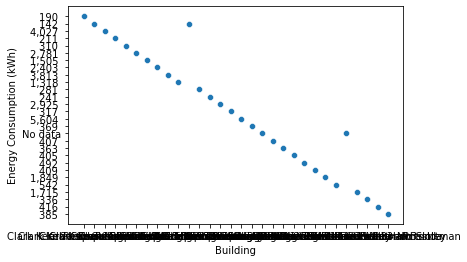

In [70]:
#reads the csv with all of the data and converts it into a scatterplot
df = pd.read_csv('/Users/rianakahara/Downloads/daily_energy_consumption.csv')
sns.scatterplot(data = df, x = 'Building', y = 'Energy Consumption (kWh)')

### Statistical Analysis 
We want to assess the efficacy of programs like the Cool Campus Challenge, a week-long initiatve incentivizing campus residents to reduce their energy and water footprints through guided challenges. We will be conducting a simple regression test to see if there were statistically significant differences in the energy levels during the one week challenge versus trend data before and after the challenge

Here is the source I referenced to conduct the test: https://realpython.com/linear-regression-in-python/#simple-linear-regression

We will need the following packages: NumPy, scikit-learn, and statsmodels (optional)

In [71]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [75]:
#we will be using the following arrays as examples. In a dataframe, each column will be a dataframe
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
#the reshape argument converts this array into a column so we can create a matrix of values 
y = np.array([5, 20, 14, 32, 22, 38])

In [77]:
#we now create a linear regression model and fit it to the existing data
model = LinearRegression().fit(x, y)

#obtain the r-squared value by calling .score()
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

#.score() has a lot of other built-in arguments that allow you to obtain the intercept and slope of the regression line
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

#note: the trailing underscore indicates the values are an estimate

coefficient of determination: 0.7158756137479542
intercept: 5.633333333333329
slope: [0.54]
